In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn
from shapely.geometry import Point
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

%matplotlib inline 

In [9]:
%%time
may_trip = pd.read_csv('../data/may_trip.csv')
may_trip.head()

Wall time: 4.9 s


,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01 00:00:00,00:00:20.460000,2019-05-01 00:00:00,00:02:52.346666,36.15710,-86.80360,36.15660,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000
1,2019-05-01 00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01 00:00:00,00:01:50.090000,2019-05-01 00:00:00,00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000
2,2019-05-01 00:05:55.570000,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01 00:00:00,00:03:47.363333,2019-05-01 00:00:00,00:07:13.596666,36.15470,-86.78180,36.15650,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530000
3,2019-05-01 00:05:55.570000,Bird,BRD2166,PoweredZIIVX,3.0000,1200.78744,2019-05-01 00:00:00,00:04:21.386666,2019-05-01 00:00:00,00:06:59.176666,36.14940,-86.77950,36.15310,-86.77960,"[[36.149741,-86.779344],[36.149741,-86.779327]...",2019-05-02 05:30:24.237000
4,2019-05-01 00:05:55.570000,Bird,BRD2165,PoweredJ7MB3,2.0000,351.04988,2019-05-01 00:00:00,00:04:27.796666,2019-05-01 00:00:00,00:06:23.150000,36.17780,-86.78660,36.17740,-86.78760,"[[36.177699,-86.786477],[36.177711,-86.786469]...",2019-05-02 05:30:24.207000


In [4]:
may_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224969 entries, 0 to 224968
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   pubTimeStamp    224969 non-null  object 
 1   companyName     224969 non-null  object 
 2   tripRecordNum   224969 non-null  object 
 3   sumdID          224969 non-null  object 
 4   tripDuration    224969 non-null  float64
 5   tripDistance    224969 non-null  float64
 6   startDate       224969 non-null  object 
 7   startTime       224969 non-null  object 
 8   endDate         224969 non-null  object 
 9   endTime         224969 non-null  object 
 10  startLatitude   224969 non-null  float64
 11  startLongitude  224969 non-null  float64
 12  endLatitude     224969 non-null  float64
 13  endLongitude    224969 non-null  float64
 14  tripRoute       224969 non-null  object 
 15  create_dt       224969 non-null  object 
dtypes: float64(6), object(10)
memory usage: 27.5+ MB


In [25]:
may_trip.endTime = pd.to_datetime(may_trip.endTime)
may_trip.endTime = may_trip.endTime.dt.time
print(may_trip.head())

                 pubTimeStamp companyName tripRecordNum         sumdID  \
0  2019-05-01 00:00:55.423000        Bird       BRD2134   Powered9EAJL   
1  2019-05-01 00:03:33.147000        Lyft          LFT5  Powered296631   
2  2019-05-01 00:05:55.570000        Bird       BRD2168   Powered7S2UU   
3  2019-05-01 00:05:55.570000        Bird       BRD2166   PoweredZIIVX   
4  2019-05-01 00:05:55.570000        Bird       BRD2165   PoweredJ7MB3   

   tripDuration  tripDistance            startDate        startTime  \
0        3.0000     958.00528  2019-05-01 00:00:00  00:00:20.460000   
1        1.7156    1371.39112  2019-05-01 00:00:00  00:01:50.090000   
2        3.0000    2296.58800  2019-05-01 00:00:00  00:03:47.363333   
3        3.0000    1200.78744  2019-05-01 00:00:00  00:04:21.386666   
4        2.0000     351.04988  2019-05-01 00:00:00  00:04:27.796666   

               endDate          endTime  startLatitude  startLongitude  \
0  2019-05-01 00:00:00  00:02:52.346666       36.15710

In [70]:
import datetime

may_trip.startDate = pd.to_datetime(may_trip.startDate, format="%Y/%m/%d")
may_trip.endDate = pd.to_datetime(may_trip.endDate, format="%Y/%m/%d")

may_trip['start'] = may_trip.apply(lambda r : pd.datetime.combine(r['startDate'],r['startTime']),1)
may_trip['end'] = may_trip.apply(lambda r : pd.datetime.combine(r['endDate'],r['endTime']),1)
may_trip['totaltime'] = may_trip['end'] - may_trip['start']

C:\Users\chris\AppData\Local\Temp/ipykernel_10040/1308212954.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  may_trip['start'] = may_trip.apply(lambda r : pd.datetime.combine(r['startDate'],r['startTime']),1)
C:\Users\chris\AppData\Local\Temp/ipykernel_10040/1308212954.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  may_trip['end'] = may_trip.apply(lambda r : pd.datetime.combine(r['endDate'],r['endTime']),1)


In [71]:
print(may_trip.head())

                 pubTimeStamp companyName tripRecordNum         sumdID  \
0  2019-05-01 00:00:55.423000        Bird       BRD2134   Powered9EAJL   
1  2019-05-01 00:03:33.147000        Lyft          LFT5  Powered296631   
2  2019-05-01 00:05:55.570000        Bird       BRD2168   Powered7S2UU   
3  2019-05-01 00:05:55.570000        Bird       BRD2166   PoweredZIIVX   
4  2019-05-01 00:05:55.570000        Bird       BRD2165   PoweredJ7MB3   

   tripDuration  tripDistance  startDate        startTime    endDate  \
0        3.0000     958.00528 2019-05-01  00:00:20.460000 2019-05-01   
1        1.7156    1371.39112 2019-05-01  00:01:50.090000 2019-05-01   
2        3.0000    2296.58800 2019-05-01  00:03:47.363333 2019-05-01   
3        3.0000    1200.78744 2019-05-01  00:04:21.386666 2019-05-01   
4        2.0000     351.04988 2019-05-01  00:04:27.796666 2019-05-01   

           endTime  startLatitude  startLongitude  endLatitude  endLongitude  \
0  00:02:52.346666       36.15710       -8

In [75]:
may_trip.sort_values(by=['totaltime'])

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,start,end,totaltime
185052,2019-05-26 19:15:08.280000,Bird,BRD3308,PoweredUNKNOWN,0.0,0.00000,2019-05-26,19:17:03.860000,2019-05-26,19:17:04.733333,36.164700,-86.781000,36.164700,-86.781000,[],2019-05-27 05:31:57.320000,2019-05-26 19:17:03.860000,2019-05-26 19:17:04.733333,0 days 00:00:00.873333
160671,2019-05-24 23:03:08.200000,Bird,BRD3253,PoweredUNKNOWN,0.0,0.00000,2019-05-24,23:04:53.123333,2019-05-24,23:04:54.103333,36.161700,-86.774000,36.161700,-86.774000,[],2019-05-25 05:31:44.330000,2019-05-24 23:04:53.123333,2019-05-24 23:04:54.103333,0 days 00:00:00.980000
198810,2019-05-27 20:16:14.983000,Bird,BRD2603,PoweredUNKNOWN,0.0,0.00000,2019-05-27,20:16:36.093333,2019-05-27,20:16:37.203333,36.163700,-86.776300,36.163700,-86.776300,[],2019-05-28 05:31:55.520000,2019-05-27 20:16:36.093333,2019-05-27 20:16:37.203333,0 days 00:00:01.110000
155503,2019-05-24 12:52:40.937000,Bird,BRD91,PoweredUNKNOWN,0.0,0.00000,2019-05-24,12:54:37.006666,2019-05-24,12:54:38.163333,36.155400,-86.781100,36.155400,-86.781100,[],2019-05-25 05:30:57.263000,2019-05-24 12:54:37.006666,2019-05-24 12:54:38.163333,0 days 00:00:01.156667
161433,2019-05-25 00:18:11.863000,Bird,BRD3697,PoweredUNKNOWN,0.0,0.00000,2019-05-25,00:19:35.916666,2019-05-25,00:19:37.200000,36.173600,-86.785400,36.173600,-86.785400,[],2019-05-26 05:30:26.473000,2019-05-25 00:19:35.916666,2019-05-25 00:19:37.200000,0 days 00:00:01.283334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112598,2019-05-18 14:20:06.423000,SPIN,SPI43,Powered5839762,6496.0,193.56956,2019-05-14,01:59:57,2019-05-18,14:15:24,36.162934,-86.777197,36.163460,-86.777320,"[[36.16344,-86.77733],[36.16344,-86.77733],[36...",2019-05-19 09:40:48.260000,2019-05-14 01:59:57.000000,2019-05-18 14:15:24.000000,4 days 12:15:27
216554,2019-05-30 23:41:06.850000,SPIN,SPI1308,Powered1932731,7332.0,1706.03680,2019-05-25,21:25:54,2019-05-30,23:37:35,36.163341,-86.771313,36.164760,-86.776830,"[[36.1647761,-86.7767455],[36.16476,-86.77683]...",2019-05-31 08:54:59.280000,2019-05-25 21:25:54.000000,2019-05-30 23:37:35.000000,5 days 02:11:41
161280,2019-05-24 23:50:53.553000,SPIN,SPI450,Powered2043594,9000.0,7700.13148,2019-05-18,17:47:30,2019-05-24,23:47:10,36.163099,-86.776226,36.149981,-86.796673,"[[36.14998057022332,-86.796672726130851],[36.1...",2019-05-25 08:36:19.873000,2019-05-18 17:47:30.000000,2019-05-24 23:47:10.000000,6 days 05:59:40
168630,2019-05-25 18:16:36.020000,SPIN,SPI17,Powered6197635,11156.0,3517.06048,2019-05-18,00:18:57,2019-05-25,18:14:12,36.159250,-86.772751,36.163797,-86.783278,"[[36.163834653245111,-86.783087877090026],[36....",2019-05-26 09:10:01.160000,2019-05-18 00:18:57.000000,2019-05-25 18:14:12.000000,7 days 17:55:15


In [81]:
may_trip['seconds'] = may_trip['totaltime'].dt.total_seconds()
print(may_trip.head())

                 pubTimeStamp companyName tripRecordNum         sumdID  \
0  2019-05-01 00:00:55.423000        Bird       BRD2134   Powered9EAJL   
1  2019-05-01 00:03:33.147000        Lyft          LFT5  Powered296631   
2  2019-05-01 00:05:55.570000        Bird       BRD2168   Powered7S2UU   
3  2019-05-01 00:05:55.570000        Bird       BRD2166   PoweredZIIVX   
4  2019-05-01 00:05:55.570000        Bird       BRD2165   PoweredJ7MB3   

   tripDuration  tripDistance  startDate        startTime    endDate  \
0        3.0000     958.00528 2019-05-01  00:00:20.460000 2019-05-01   
1        1.7156    1371.39112 2019-05-01  00:01:50.090000 2019-05-01   
2        3.0000    2296.58800 2019-05-01  00:03:47.363333 2019-05-01   
3        3.0000    1200.78744 2019-05-01  00:04:21.386666 2019-05-01   
4        2.0000     351.04988 2019-05-01  00:04:27.796666 2019-05-01   

           endTime  startLatitude  startLongitude  endLatitude  endLongitude  \
0  00:02:52.346666       36.15710       -8

In [91]:
under_minute = may_trip.loc[may_trip['seconds'] <= 60]
under_minute.count()

pubTimeStamp      4559
companyName       4559
tripRecordNum     4559
sumdID            4559
tripDuration      4559
tripDistance      4559
startDate         4559
startTime         4559
endDate           4559
endTime           4559
startLatitude     4559
startLongitude    4559
endLatitude       4559
endLongitude      4559
tripRoute         4559
create_dt         4559
start             4559
end               4559
totaltime         4559
seconds           4559
dtype: int64

Aha! Quite a few under a minute. 

In [90]:
over_day = may_trip.loc[may_trip['seconds'] >= 86400]
over_day.count()

pubTimeStamp      23
companyName       23
tripRecordNum     23
sumdID            23
tripDuration      23
tripDistance      23
startDate         23
startTime         23
endDate           23
endTime           23
startLatitude     23
startLongitude    23
endLatitude       23
endLongitude      23
tripRoute         23
create_dt         23
start             23
end               23
totaltime         23
seconds           23
dtype: int64

Not nearly as many over 24 hours.

In [93]:
may_trip = may_trip.loc[may_trip['seconds'] >= 60]
may_trip = may_trip.loc[may_trip['seconds'] <= 86400]

In [94]:
may_trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220387 entries, 0 to 224967
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   pubTimeStamp    220387 non-null  object         
 1   companyName     220387 non-null  object         
 2   tripRecordNum   220387 non-null  object         
 3   sumdID          220387 non-null  object         
 4   tripDuration    220387 non-null  float64        
 5   tripDistance    220387 non-null  float64        
 6   startDate       220387 non-null  datetime64[ns] 
 7   startTime       220387 non-null  object         
 8   endDate         220387 non-null  datetime64[ns] 
 9   endTime         220387 non-null  object         
 10  startLatitude   220387 non-null  float64        
 11  startLongitude  220387 non-null  float64        
 12  endLatitude     220387 non-null  float64        
 13  endLongitude    220387 non-null  float64        
 14  tripRoute       2203

Now, to break out the trip routes.

In [100]:
promise_zone = gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.shp')

In [101]:
promise_zone.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    6 non-null      int64   
 1   ZONE_ID     6 non-null      int64   
 2   SHAPE_STAr  6 non-null      float64 
 3   SHAPE_STLe  6 non-null      float64 
 4   geometry    6 non-null      geometry
dtypes: float64(2), geometry(1), int64(2)
memory usage: 368.0 bytes


In [102]:
print(promise_zone.crs)

epsg:2274


In [122]:
promise_zone = promise_zone.geometry.to_crs('EPSG:4326')

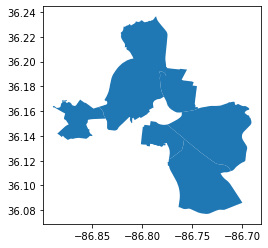

In [123]:
promise_zone.plot();

In [124]:
promise_zone.geometry.centroid

C:\Users\chris\AppData\Local\Temp/ipykernel_10040/588962931.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  promise_zone.geometry.centroid


0    POINT (-86.76416 36.17641)
1    POINT (-86.77976 36.13860)
2    POINT (-86.72581 36.14281)
3    POINT (-86.74062 36.10276)
4    POINT (-86.80486 36.18972)
5    POINT (-86.86377 36.15331)
dtype: geometry

In [125]:
center = promise_zone.geometry.centroid[3]

C:\Users\chris\AppData\Local\Temp/ipykernel_10040/2598561920.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = promise_zone.geometry.centroid[3]


In [126]:
print(center)

POINT (-86.74061993809845 36.10276436868096)


In [127]:
promise_center = [center.y, center.x]

In [131]:
m = folium.Map(promise_center, zoom_start=12)

for _, row in may_trip.head(10).iterrows():
    folium.CircleMarker([row['startLatitude'], row['startLongitude']],
                        radius=15,
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

    folium.CircleMarker([row['endLatitude'], row['endLongitude']],
                        radius=15,
                        fill_color="red", # divvy color
                       ).add_to(m)

    folium.PolyLine([[row['startLatitude'], row['startLongitude']], 
                     [row['endLatitude'], row['endLongitude']]]).add_to(m)
m

In [139]:
cluster_m = folium.Map(promise_center, zoom_start=12)

marker_cluster = MarkerCluster().add_to(cluster_m)

folium.GeoJson(promise_zone).add_to(cluster_m)

for _, row in may_trip.head(500).iterrows():
    folium.CircleMarker([row['startLatitude'], row['startLongitude']],
                        radius=4,
                        fill_color="#3db7e4", # divvy color
                       ).add_to(cluster_m)

    folium.CircleMarker([row['endLatitude'], row['endLongitude']],
                        radius=4,
                        fill_color="red", # divvy color
                       ).add_to(cluster_m)

    folium.PolyLine([[row['startLatitude'], row['startLongitude']], 
                     [row['endLatitude'], row['endLongitude']]]).add_to(cluster_m)

cluster_m